In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables) 


{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'ID'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.concat([X,y], axis=1)
df.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [6]:
df.shape

(1700, 123)

In [7]:
df.isnull().sum()

AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
FK_STENOK     73
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 123, dtype: int64

In [8]:
df.describe(include='number')

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
target = "ZSN"
vc = df[target].value_counts(dropna=False)
print("\n", target)
print(vc)
print("\n", vc / vc.sum() * 100)


 ZSN
ZSN
0    1306
1     394
Name: count, dtype: int64

 ZSN
0    76.823529
1    23.176471
Name: count, dtype: float64


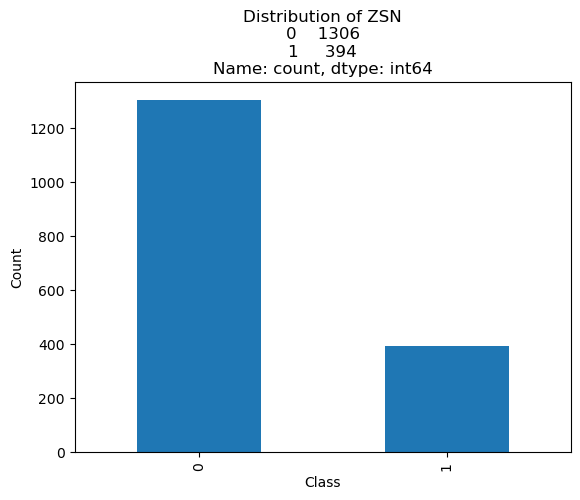

In [11]:
vc.plot(kind="bar")
plt.title(f"Distribution of {vc}")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [19]:
corr = df.corr(numeric_only=True)["ZSN"].abs().sort_values(ascending=False)
print(corr.head(15))
corr_matrix = df.corr(numeric_only=True)

ZSN              1.000000
IBS_NASL         0.182574
ZSN_A            0.169750
AGE              0.146107
endocr_01        0.126239
OTEK_LANC        0.125196
KFK_BLOOD        0.121716
NA_R_3_n         0.117053
zab_leg_01       0.113460
n_r_ecg_p_06     0.102929
NA_R_2_n         0.101685
ritm_ecg_p_02    0.100857
SEX              0.097490
FIBR_PREDS       0.095725
nr_04            0.088928
Name: ZSN, dtype: float64


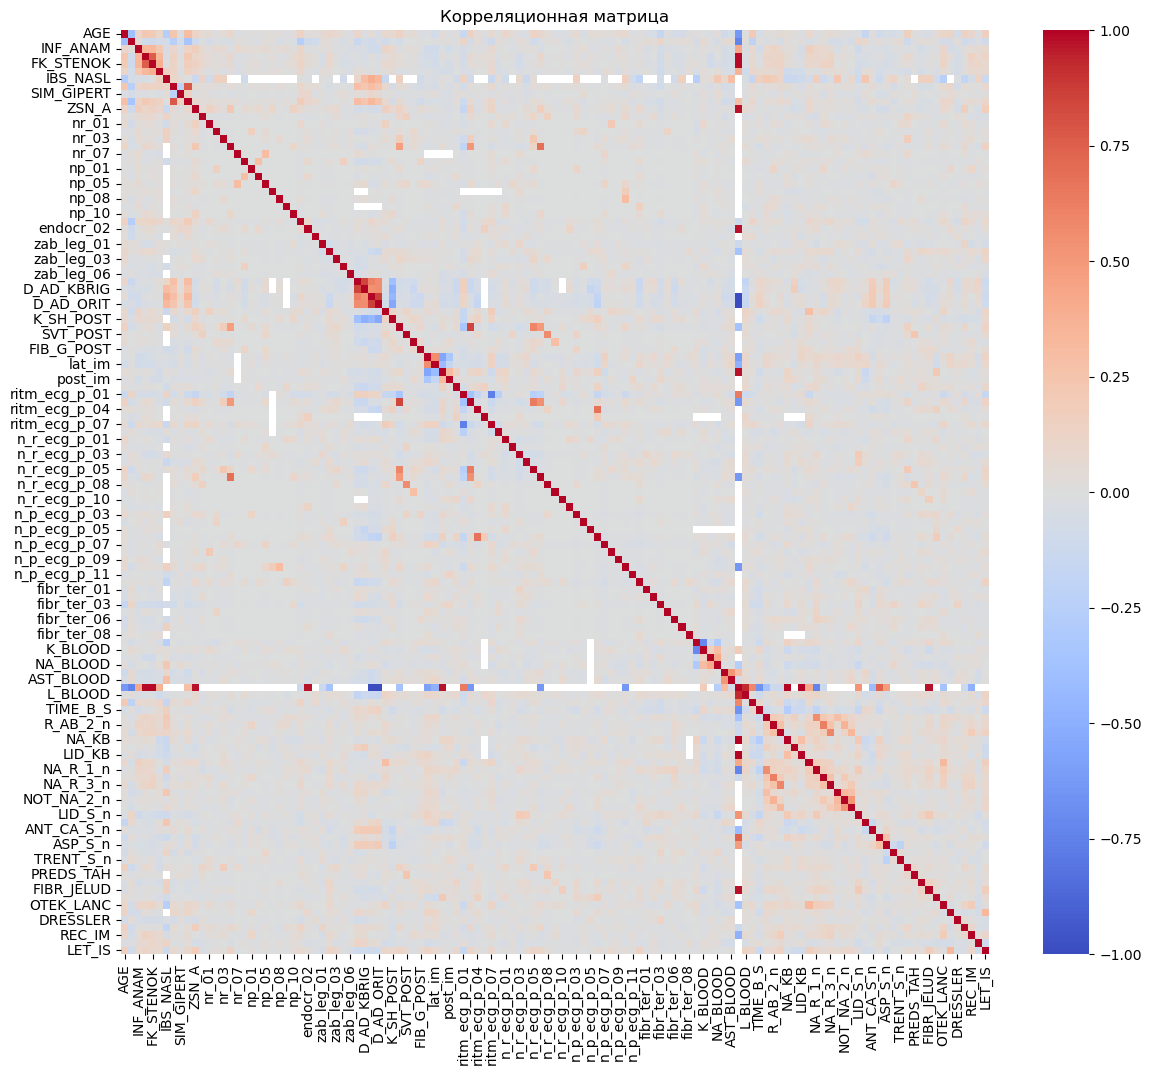

In [23]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


In [31]:
X = df.drop(columns=target)
y = df[target]

# train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [34]:
model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    ))
])


In [36]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [45]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[279 113]
 [ 55  63]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       392
           1       0.36      0.53      0.43       118

    accuracy                           0.67       510
   macro avg       0.60      0.62      0.60       510
weighted avg       0.72      0.67      0.69       510



In [55]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# --- model ---
rf_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("clf", RandomForestClassifier(
        n_estimators=700,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ))
])

# --- fit ---
rf_model.fit(X_train, y_train)

# --- predictions ---
pred = rf_model.predict(X_test)
proba = rf_model.predict_proba(X_test)[:, 1]

# --- metrics ---
print("\n=== ZSN (RandomForest) ===")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, proba))

# --- feature importance ---
# Важно: берем важности у "clf" внутри pipeline
rf_clf = rf_model.named_steps["clf"]
importances = rf_clf.feature_importances_

fi = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nTop-10 features:")
print(fi.head(10))


=== ZSN (RandomForest) ===
[[388   4]
 [ 99  19]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       392
           1       0.83      0.16      0.27       118

    accuracy                           0.80       510
   macro avg       0.81      0.58      0.58       510
weighted avg       0.80      0.80      0.74       510

ROC-AUC: 0.7738779833967485

Top-10 features:
      feature  importance
10      ZSN_A    0.064142
0         AGE    0.059371
88    L_BLOOD    0.045202
89        ROE    0.045181
82    K_BLOOD    0.037757
86  AST_BLOOD    0.036042
84   NA_BLOOD    0.034507
85  ALT_BLOOD    0.033834
35  S_AD_ORIT    0.032072
90   TIME_B_S    0.029480


In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    precision_recall_curve,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# вероятности класса 1 для ZSN (один таргет!)
proba = rf_model.predict_proba(X_test)[:, 1]

# y_test может быть Series или DataFrame — обработаем оба варианта
if hasattr(y_test, "to_numpy") and not hasattr(y_test, "columns"):
    y_true = y_test.to_numpy()
else:
    y_true = y_test["ZSN"].to_numpy()

# ROC-AUC (не зависит от порога)
print("\nROC-AUC:", roc_auc_score(y_true, proba))

# --- PR curve + thresholds ---
precision, recall, thr = precision_recall_curve(y_true, proba)

p = precision[:-1]
r = recall[:-1]
t = thr

# F1
f1 = 2 * p * r / (p + r + 1e-9)
best_thr_f1 = t[np.argmax(f1)]

# F2 (больше упор на recall)
beta = 2
f2 = (1 + beta**2) * p * r / (beta**2 * p + r + 1e-9)
best_thr_f2 = t[np.argmax(f2)]

# "closest to (1,1)" по PR (евклидово расстояние)
dist = np.sqrt((1 - p)**2 + (1 - r)**2)
best_thr_closest = t[np.argmin(dist)]

for name, best_thr in [
    ("F1", best_thr_f1),
    ("F2", best_thr_f2),
    ("Closest(1,1)", best_thr_closest)
]:
    y_pred = (proba >= best_thr).astype(int)
    print(f"\nBest by {name} threshold: {best_thr:.4f}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, zero_division=0))

# --- Top features (RandomForest feature_importances_) ---
rf_clf = rf_model.named_steps["clf"]          # RandomForestClassifier
importances = rf_clf.feature_importances_

fi = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nTop-10 features:")
print(fi.head(10))



ROC-AUC: 0.7738779833967485

Best by F1 threshold: 0.2171
[[262 130]
 [ 30  88]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       392
           1       0.40      0.75      0.52       118

    accuracy                           0.69       510
   macro avg       0.65      0.71      0.64       510
weighted avg       0.78      0.69      0.71       510


Best by F2 threshold: 0.1614
[[157 235]
 [  8 110]]
              precision    recall  f1-score   support

           0       0.95      0.40      0.56       392
           1       0.32      0.93      0.48       118

    accuracy                           0.52       510
   macro avg       0.64      0.67      0.52       510
weighted avg       0.81      0.52      0.54       510


Best by Closest(1,1) threshold: 0.2171
[[262 130]
 [ 30  88]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       392
           1       0.40      0.75      

In [62]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

hgb_model = HistGradientBoostingClassifier(
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

hgb_model.fit(X_train, y_train)

pred_hgb = hgb_model.predict(X_test)
proba_hgb = hgb_model.predict_proba(X_test)[:, 1]

print("\n=== ZSN (HistGradientBoosting) ===")
print(confusion_matrix(y_test, pred_hgb))
print(classification_report(y_test, pred_hgb, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, proba_hgb))



=== ZSN (HistGradientBoosting) ===
[[367  25]
 [ 79  39]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       392
           1       0.61      0.33      0.43       118

    accuracy                           0.80       510
   macro avg       0.72      0.63      0.65       510
weighted avg       0.77      0.80      0.77       510

ROC-AUC: 0.7580638187478381


In [77]:
from catboost import CatBoostClassifier

X = df.drop(columns=[target])
y = df[target]

# если есть категориальные признаки (строки), CatBoost их умеет, но нужно передать индексы
cat_features = [i for i, c in enumerate(X.columns) if X[c].dtype == "object"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function="Logloss",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train, cat_features=cat_features if cat_features else None)

pred = cat_model.predict(X_test, prediction_type="Class").astype(int).ravel()
proba = cat_model.predict_proba(X_test)[:, 1]

print("\n=== ZSN (CatBoost) ===")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, proba))



=== ZSN (CatBoost) ===
[[364  28]
 [ 77  41]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       392
           1       0.59      0.35      0.44       118

    accuracy                           0.79       510
   macro avg       0.71      0.64      0.66       510
weighted avg       0.77      0.79      0.77       510

ROC-AUC: 0.7491136285022483


In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

X = df.drop(columns=[target])
y = df[target]

# split со стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# колонки по типам
num_cols = X.select_dtypes(include=["number", "bool"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# препроцессинг
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# модель
xgb = XGBClassifier(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

model = Pipeline([
    ("preprocess", preprocess),
    ("clf", xgb)
])

# fit
model.fit(X_train, y_train)

# predict / proba
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]

print("\n=== ZSN (XGBoost) ===")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_test, proba))

# --- Feature importance (gain) ---
pre = model.named_steps["preprocess"]
clf = model.named_steps["clf"]

feature_names = pre.get_feature_names_out()
gain_dict = clf.get_booster().get_score(importance_type="gain")

fi = pd.DataFrame({
    "feature": feature_names,
    "gain": [gain_dict.get(f, 0.0) for f in feature_names]
}).sort_values("gain", ascending=False)

print("\nTop-10 features by GAIN:")
print(fi.head(10))


=== ZSN (XGBoost) ===
[[375  17]
 [ 81  37]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       392
           1       0.69      0.31      0.43       118

    accuracy                           0.81       510
   macro avg       0.75      0.64      0.66       510
weighted avg       0.79      0.81      0.78       510

ROC-AUC: 0.7528969214804566

Top-10 features by GAIN:
           feature  gain
0         num__AGE   0.0
1         num__SEX   0.0
2    num__INF_ANAM   0.0
3   num__STENOK_AN   0.0
4   num__FK_STENOK   0.0
5    num__IBS_POST   0.0
6    num__IBS_NASL   0.0
7          num__GB   0.0
8  num__SIM_GIPERT   0.0
9     num__DLIT_AG   0.0


In [83]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    classification_report
)

models = {
    "RandomForest": rf_model,
    "HistGB": hgb_model,
    "XGBoost": xgb,
}

results = []

for name, model in models.items():
    
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)
    
    roc = roc_auc_score(y_test, proba)
    pr_auc = average_precision_score(y_test, proba)
    
    report = classification_report(y_test, pred, output_dict=True, zero_division=0)
    
    results.append({
        "Model": name,
        "ROC-AUC": roc,
        "PR-AUC": pr_auc,
        "Recall (1)": report["1"]["recall"],
        "Precision (1)": report["1"]["precision"],
        "F1 (1)": report["1"]["f1-score"]
    })

results_df = pd.DataFrame(results).sort_values("ROC-AUC", ascending=False)

print(results_df)
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
    print(name, "CV ROC-AUC:", scores.mean())


          Model   ROC-AUC    PR-AUC  Recall (1)  Precision (1)    F1 (1)
0  RandomForest  0.773878  0.541981    0.161017       0.826087  0.269504
1        HistGB  0.758064  0.545875    0.330508       0.609375  0.428571
2       XGBoost  0.707303  0.460054    0.262712       0.596154  0.364706
RandomForest CV ROC-AUC: 0.6886559059356031
HistGB CV ROC-AUC: 0.6736163935246972
XGBoost CV ROC-AUC: 0.6670708882460142


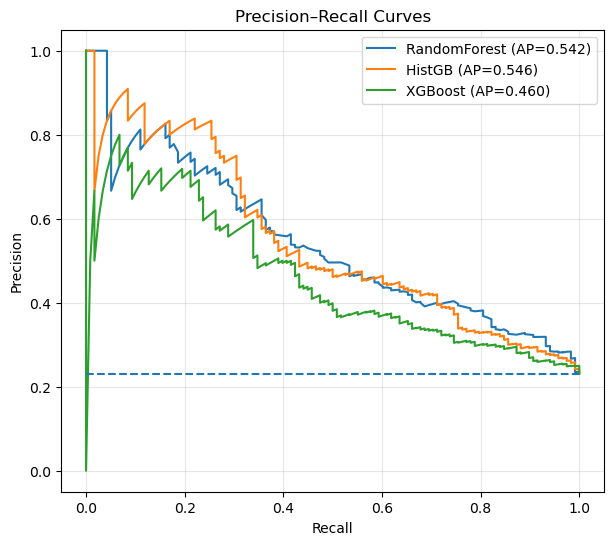

In [86]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(7, 6))

for name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, proba)
    ap = average_precision_score(y_test, proba)
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

# baseline (доля положительного класса)
base_rate = (y_test == 1).mean()
plt.hlines(base_rate, 0, 1, linestyles="--")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
   

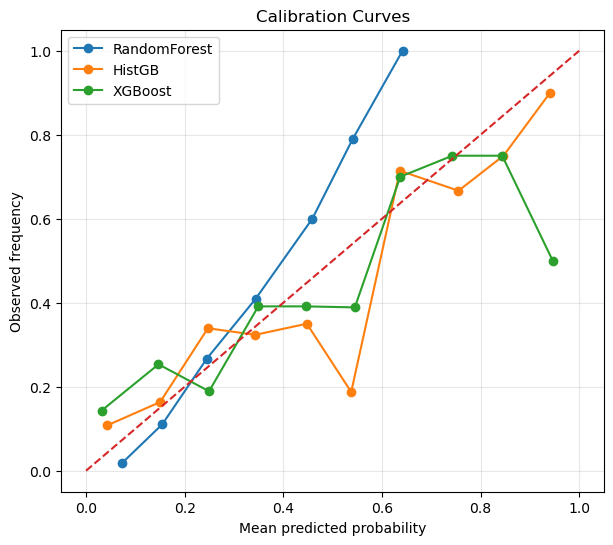

In [87]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))

for name, model in models.items():
    proba = model.predict_proba(X_test)[:,1]
    frac_pos, mean_pred = calibration_curve(y_test, proba, n_bins=10)
    plt.plot(mean_pred, frac_pos, marker="o", label=name)

plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("Mean predicted probability")
plt.ylabel("Observed frequency")
plt.title("Calibration Curves")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


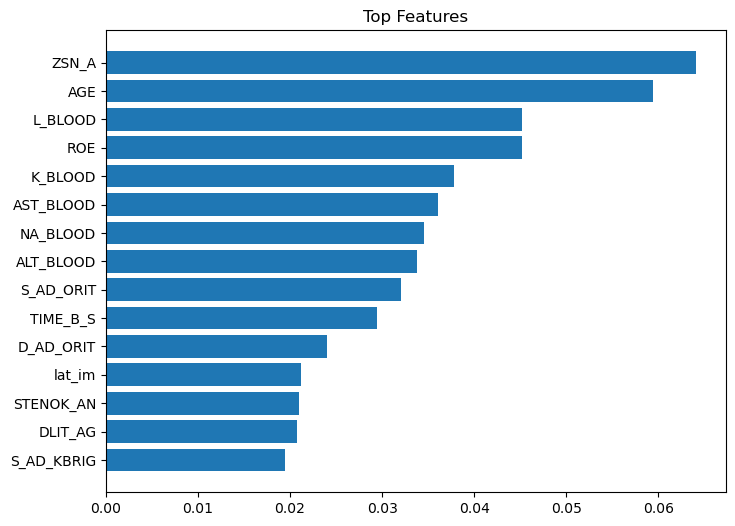

In [88]:
fi = fi.head(15)

plt.figure(figsize=(8,6))
plt.barh(fi["feature"], fi["importance"])
plt.gca().invert_yaxis()
plt.title("Top Features")
plt.show()
